In [ ]:
import time
import os

import numpy as np

import torch
import torch.nn.functional as F
import torch.nn as nn


from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.utils import make_grid
from PIL import Image
import matplotlib.pyplot as plt

import argparse

import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as Data
import matplotlib.pyplot as plt
from PIL import Image
import torch.nn as nn
import torch.nn.functional as F
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
train_transform = transforms.Compose([ # Compose multi transform functions
            transforms.RandomCrop(size=(32, 32), padding=4),# random copping
            transforms.RandomHorizontalFlip(), # Random horizontal flip
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],std=[0.2471, 0.2435, 0.2616])
        ])
        
val_transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],std=[0.2471, 0.2435, 0.2616])
        ])        

In [ ]:
batch_size = 128
train_dataset = datasets.CIFAR10(root='data', 
                                 train=True, 
                                 transform=train_transform,
                                 download=True)

test_dataset = datasets.CIFAR10(root='data', 
                                train=False, 
                                transform=val_transform)

train_dataset
test_dataset

train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=batch_size, 
                          shuffle=True)

test_loader = DataLoader(dataset=test_dataset, 
                         batch_size=batch_size, 
                         shuffle=False)
valid_loader = test_loader

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: [    1     2     4     1     6     0     4     6     3     2     4     9
     3     8     4     1     2     5     3     5     6     1     0     3
     3     0     9     4     4     1     6     1     3     7     0     9
     2     4     5     0     3     2     9     6     4     8     5     3
     8     3     5     5     4     0     9     2     8     1     6     1
     8     9     4     9     8     7     9     6     3     5     4     0
     0     0     4     6     1     9     3     3     9     3     3     9
     1     3     1     3     1     9     1     1     3     3     1     6
     9     2     5     0     6     6     0     2     3     6     4     6
     5     8     2     9     2     4     6     4     1     9     5     9
     9     5     7     3     4     2     9     3]
Class:  car bird deer car frog plane deer frog cat bird deer truck cat ship deer car bird dog cat dog frog car plane cat cat plane truck deer deer car frog car cat horse plane truck bird deer dog plane cat bird tr

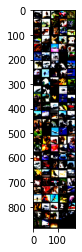

In [ ]:
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
np.set_printoptions(formatter=dict(int=lambda x: f'{x:5}')) # to widen the printed array

# Grab the first batch of 10 images
for images,labels in train_loader: 
    break

# Print the labels
print('Label:', labels.numpy())
print('Class: ', *np.array([class_names[i] for i in labels]))

# Print the images
im = make_grid(images, nrow=5)  # the default nrow is 8
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [ ]:
import time
import os

import numpy as np

import torch
import torch.nn.functional as F
import torch.nn as nn


from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms

from PIL import Image
import matplotlib.pyplot as plt

class VGG19(torch.nn.Module):
    def __init__(self,num_classes):
        super(VGG19, self).__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=64,kernel_size=(3,3),stride=(1,1),padding=1),
            nn.BatchNorm2d(num_features=64),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3,3), stride=(1,1), padding=1),
            nn.BatchNorm2d(num_features=64),
            nn.ReLU(),
            nn.Conv2d(in_channels=64,out_channels=64,kernel_size=(3,3),stride=(1,1),padding=1),
            nn.BatchNorm2d(num_features=64),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(num_features=64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2),stride=(2,2))
        )
        self.block2 = nn.Sequential(
            nn.Conv2d(in_channels=64,out_channels=128,kernel_size=(3,3),stride=(1,1),padding=1),
            nn.BatchNorm2d(num_features=128),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3,3), stride=(1,1), padding=1),
            nn.BatchNorm2d(num_features=128),
            nn.ReLU(),
            nn.Conv2d(in_channels=128,out_channels=128,kernel_size=(3,3),stride=(1,1),padding=1),
            nn.BatchNorm2d(num_features=128),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(num_features=128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2),stride=(2,2))
        )
        self.block3 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
        )
        self.block4 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
        )
        self.block5 = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
        )
        self.classifier = nn.Sequential(
            nn.Linear(512*1*1,4096),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(4096,4096),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(4096,num_classes)
        )
    def forward(self,x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.block5(x)
        logits = self.classifier(x.view(-1,512*1*1))
        probas = F.softmax(logits,dim = 1)
        return logits,probas


In [ ]:
torch.manual_seed(101)
model = VGG19(10).to(device)
x = torch.randn(2, 3, 32, 32).cuda() #2x3 matrix with each element to be 32x32
y = model(x)

print(model)
print(y)

VGG19(
  (block1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1

In [ ]:
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9, weight_decay=5e-4)

In [ ]:
def compute_accuracy_and_loss(model, data_loader, device):
    correct_pred, num_examples = 0, 0
    cross_entropy = 0.
    for i, (features, targets) in enumerate(data_loader):
            
        features = features.to(device)
        targets = targets.to(device)

        logits, probas = model(features)
        cross_entropy += F.cross_entropy(logits, targets).item()
        _, predicted_labels = torch.max(probas, 1)
        num_examples += targets.size(0)
        correct_pred += (predicted_labels == targets).sum()
    return correct_pred.float()/num_examples * 100, cross_entropy/num_examples
    

import time
start_time = time.time()

epochs = 50
train_losses = []
val_losses = []
train_accs = []
val_accs = []


for i in range(epochs):
    model.train()
    
    # Run the training batches
    for batch_idx, (X_train, y_train) in enumerate(train_loader):#50000/64 = 782 batches

        X_train, y_train = X_train.to(device), y_train.to(device)
        # Apply the model
        logits, probas = model(X_train)
        loss = F.cross_entropy(logits, y_train)
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
#         if b%100 == 0:
#             print(f'epoch: {i:2}  batch: {b:4} [{64*b:6}/50000]  loss: {loss.item():10.8f}  \
# accuracy: {trn_corr.item()*100/(64*b):7.3f}%')
        if not batch_idx % 300:
            print (f'Epoch: {i+1:03d}/{epochs:03d} | '
                   f'Batch {batch_idx:03d}/{len(train_loader):03d} |' 
                   f' Cost: {loss:.4f}')
        
   
    model.eval()
    # Run the testing batches
    with torch.no_grad():
        train_acc, train_loss = compute_accuracy_and_loss(model, train_loader, device=device)
        valid_acc, valid_loss = compute_accuracy_and_loss(model, valid_loader, device=device)
        train_accs.append(train_acc)
        val_accs.append(valid_acc)
        train_losses.append(train_loss)
        val_losses.append(valid_loss)
        print(f'Epoch: {i+1:03d}/{epochs:03d} Train Acc.: {train_acc:.2f}%'
              f' | Validation Acc.: {valid_acc:.2f}%')
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            




Epoch: 001/050 | Batch 000/391 | Cost: 2.3331
Epoch: 001/050 | Batch 300/391 | Cost: 1.5845
Epoch: 001/050 Train Acc.: 45.20% | Validation Acc.: 45.27%
Epoch: 002/050 | Batch 000/391 | Cost: 1.5271
Epoch: 002/050 | Batch 300/391 | Cost: 1.3031
Epoch: 002/050 Train Acc.: 59.36% | Validation Acc.: 59.69%
Epoch: 003/050 | Batch 000/391 | Cost: 1.2109
Epoch: 003/050 | Batch 300/391 | Cost: 1.0315
Epoch: 003/050 Train Acc.: 69.36% | Validation Acc.: 69.26%
Epoch: 004/050 | Batch 000/391 | Cost: 0.7897
Epoch: 004/050 | Batch 300/391 | Cost: 0.8585
Epoch: 004/050 Train Acc.: 72.53% | Validation Acc.: 72.93%
Epoch: 005/050 | Batch 000/391 | Cost: 0.6791
Epoch: 005/050 | Batch 300/391 | Cost: 0.6973
Epoch: 005/050 Train Acc.: 76.30% | Validation Acc.: 76.07%
Epoch: 006/050 | Batch 000/391 | Cost: 0.6810
Epoch: 006/050 | Batch 300/391 | Cost: 0.5725
Epoch: 006/050 Train Acc.: 79.10% | Validation Acc.: 77.66%
Epoch: 007/050 | Batch 000/391 | Cost: 0.5119
Epoch: 007/050 | Batch 300/391 | Cost: 0.6

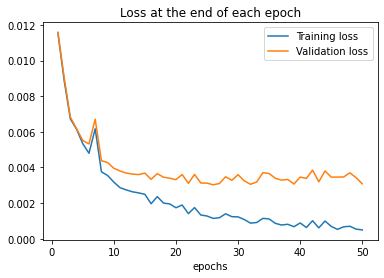

In [ ]:
plt.plot(range(1, epochs+1), train_losses, label='Training loss')
plt.plot(range(1, epochs+1), val_losses, label='Validation loss')
plt.title('Loss at the end of each epoch')
plt.xlabel('epochs')
plt.legend();

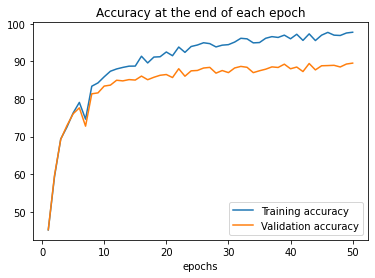

In [ ]:
plt.plot(range(1, epochs+1), train_accs, label='Training accuracy')
plt.plot(range(1, epochs+1), val_accs, label='Validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.xlabel('epochs')
plt.legend()

In [ ]:
model.eval()
with torch.set_grad_enabled(False): # save memory during inference
    test_acc, test_loss = compute_accuracy_and_loss(model, test_loader, DEVICE)
    print(f'Test accuracy: {test_acc:.2f}%')

NameError: ignored

In [ ]:
# # Create a loader for the entire the test set
# test_load_all = DataLoader(test_dataset, batch_size=10000, shuffle=False)

# with torch.no_grad():
#     correct = 0
#     for X_test, y_test in test_load_all:
#         X_test, y_test = X_test.to(device), y_test.to(device)
#         y_val = model(X_test)
#         predicted = torch.max(y_val,1)[1]
#         correct += (predicted == y_test).sum()

# arr = confusion_matrix(y_test.view(-1), predicted.view(-1))
# df_cm = pd.DataFrame(arr, class_names, class_names)
# plt.figure(figsize = (9,6))
# sn.heatmap(df_cm, annot=True, fmt="d", cmap='BuGn')
# plt.xlabel("prediction")
# plt.ylabel("label (ground truth)")
# plt.show();

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
for features, targets in train_loader:
    break
#预测环节
_, predictions = model.forward(features[:8].to(DEVICE))
predictions = torch.argmax(predictions, dim=1)
print(predictions)

features = features[:7]
fig = plt.figure()
tname = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# print(features[i].size())
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    tmp = features[i]
    plt.imshow(np.transpose(tmp, (1, 2, 0)))
    plt.title("Actual value: {}".format(tname[targets[i]])+'\n'+"Prediction value: {}".format(tname[predictions[i]]),size = 10)
    
#     plt.title("Prediction value: {}".format(tname[targets[i]]))
plt.show()
